# Лабораторная работа 8
## Двумерные начально-краевые задачи для дифференциального уравнения параболического типа

Епанешников В.С. группа М8О-406Б-19

### Задание

Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, y, t)$.

Вариант 1.

$\large\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2} + a\frac{\partial^2 u}{\partial y^2}, ~~~a > 0$

$u(0, y, t) = cos(\mu_2y)exp(-(\mu_1^2+\mu_2^2)at)$

$u(\pi, y, t) = (-1)^{\mu_1}cos(\mu_2y)exp(-(\mu_1^2+\mu_2^2)at)$

$u(x, 0, t) = cos(\mu_1x)exp(-(\mu_1^2+\mu_2^2)at)$

$u(x, \pi, t) = (-1)^{\mu_2}cos(\mu_1x)exp(-(\mu_1^2+\mu_2^2)at)$

$u(x, y, 0) = cos(\mu_1x)cos(\mu_2y)$

Аналитическое решение: $U(x, y, t) = cos(\mu_1x)cos(\mu_2y)exp(-(\mu_1^2+\mu_2^2)at)$


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_begin = 0
x_end = math.pi

y_begin = 0
y_end = math.pi

t_begin = 0
t_end = 1

a = 1
mu1 = 1
mu2 = 1

h_x = 0.01
h_y = 0.01
tau = 0.01

Начальные условия:

In [ ]:
# boundary conditions
def phi_0(y, t, a=a, mu1=mu1, mu2=mu2):
    return math.cos(mu2*y) * math.exp(-(mu1**2 + mu2**2) * a * t)

def phi_1(y, t, a=a, mu1=mu1, mu2=mu2):
    return (-1)**mu1 * math.cos(mu2*y) * math.exp(-(mu1**2 + mu2**2) * a * t)

def phi_2(x, t, a=a, mu1=mu1, mu2=mu2):
    return math.cos(mu1*x) * math.exp(-(mu1**2 + mu2**2) * a * t)

def phi_3(x, t, a=a, mu1=mu1, mu2=mu2):
    return (-1)**mu2 * math.cos(mu1*x) * math.exp(-(mu1**2 + mu2**2) * a * t)

# initial condition
def psi(x, y, mu1=mu1, mu2=mu2):
    return math.cos(mu1*x) * math.cos(mu2*y)

def solution(x, y, t, a=a, mu1=mu1, mu2=mu2):
    return math.cos(mu1*x) * math.cos(mu2*y) * math.exp(-(mu1**2 + mu2**2) * a * t)

## Аналитическое решение

Подготовим ответ, полученный аналитическим способом. С ним будем сравнивать численные методы

In [ ]:
def get_analytical_solution(
    x_range, # (x_begin, x_end)
    y_range, # (y_begin, y_end)
    t_range, # (t_begin, t_end)
    h_x, # len of cell by x
    h_y, # len of cell by y
    tau, # len of cell by t
):
    """
    Get analytical solution of 2D parabolic DE
    Returns tensor U with values of function
    """
    x = np.arange(*x_range, h_x)
    y = np.arange(*y_range, h_y)
    t = np.arange(*t_range, tau)

    res = np.zeros((len(t), len(x), len(y)))
    for idx in range(len(x)):
        for idy in range(len(y)):
            for idt in range(len(t)):
                res[idt][idx][idy] = solution(x[idx], y[idy], t[idt])
    
    return res

In [ ]:
analytical_solution = get_analytical_solution(
    x_range=(x_begin, x_end),
    y_range=(y_begin, y_end),
    t_range=(t_begin, t_end),
    h_x=h_x,
    h_y=h_y,
    tau=tau,
)

Будем складывать все решения в словарь, чтобы потом удобнее было строить графики

In [ ]:
solutions = dict()
solutions["analytical solution"] = analytical_solution

Функция для вычисления погрешности - максимального модуля ошибки

In [ ]:
def max_abs_error(A, B):
    """
    Calculate max absolute error of elements of matrices A and B
    """
    assert A.shape == B.shape
    return abs(A - B).max()

И среднего модуля ошибки:

In [ ]:
def mean_abs_error(A, B):
    """
    Calculate mean absolute error of elements of matrices A and B
    """
    assert A.shape == B.shape
    return abs(A - B).mean()

И функция для построения проекции плоскости на ось х в заданный момент времени t и при заданной координате y

In [ ]:
def plot_results(
    solutions, # dict: solutions[method name] = solution
    cur_time, # moment of time
    cur_y, # moment by y
    x_range, # (x_begin, x_end)
    y_range, # (y_begin, y_end)
    t_range, # (t_bein, t_end)
    h_x, # len of cell by x
    h_y, # len of cell by y
    tau, # len of cell by t
):
    x = np.arange(*x_range, h_x)
    y = np.arange(*y_range, h_y)
    t = np.arange(*t_range, tau)
    cur_t_id = abs(t - cur_time).argmin()
    cur_y_id = abs(y - cur_y).argmin()

    plt.figure(figsize=(15, 9))
    for method_name, solution in solutions.items():
        plt.plot(x, solution[cur_t_id][:, cur_y_id], label=method_name)

    plt.legend()
    plt.grid()
    plt.show()

Зависимость погрешности от времени

In [ ]:
def plot_errors_from_time(
    solutions, # dict: solutions[method name] = solution
    analytical_solution_name, # for comparing
    t_range, # (t_begin, t_end)
    tau, # len of cell by t
):
    """
    Plot max_abs_error = f(time)
    """
    t = np.arange(*t_range, tau)

    plt.figure(figsize=(15, 9))
    for method_name, solution in solutions.items():
        if method_name == analytical_solution_name:
            continue
        max_abs_errors = np.array([
            max_abs_error(solution[i], solutions[analytical_solution_name][i])
            for i in range(len(t))
        ])
        plt.plot(t, max_abs_errors, label=method_name)

    plt.xlabel('time')
    plt.ylabel('Max abs error')

    plt.legend()
    plt.grid()
    plt.show()

### Метод переменных направлений

Для момента времени $k+1/2$ производная по иксу будет аппроксимироваться неявно, а по игреку - явно. Для момента времени $k+1$ наоборот.

#### Шаг 1.

Решаем систему уравнений для всех $j$, чтобы получить значения в момент времени $k+1/2$:

$\large\begin{equation*}
 \begin{cases}
   bu_{1j}^{k+1/2}+cu_{2j}^{k+1/2}=d_1, 
   \\
   au_{i-1j}^{k+1/2}+bu_{ij}^{k+1/2}+cu_{i+1j}^{k+1/2}=d, ~~~i=2\dots N-2,
   \\
   au_{N-2j}^{k+1/2}+bu_{N-1j}^{k+1/2}=d_{N-1},
 \end{cases}
\end{equation*}$

$a=c=-a\tau h_y^2$

$b_j=2h_x^2h_y^2 + 2a\tau h_y^2$

$d = a\tau h_x^2 u_{ij-1}^k+(2h_x^2h_y^2 - 2a\tau h_x^2)u_{ij}^k+a\tau h_x^2u_{ij+1}^k$

$d_1=d - au_{0j}^{k+1/2}$

$d_{N-1}=d - cu_{Nj}^{k+1/2}$

#### Шаг 2.

Решаем систему уравнений для всех $i$, чтобы получить значения в момент времени $k+1$:

$\large\begin{equation*}
 \begin{cases}
   bu_{1j}^{k+1}+cu_{2j}^{k+1}=d_1, 
   \\
   au_{i-1j}^{k+1}+bu_{ij}^{k+1}+cu_{i+1j}^{k+1}=d, ~~~i=2\dots N-2,
   \\
   au_{N-2j}^{k+1}+bu_{N-1j}^{k+1}=d_{N-1},
 \end{cases}
\end{equation*}$

$a=c=-a\tau h_x^2$

$b_j=2h_x^2h_y^2 + 2a\tau h_x^2$

$d = a\tau h_y^2 u_{i-1j}^{k+1/2}+(2h_x^2h_y^2 - 2a\tau h_y^2)u_{ij}^{k+1/2}+a\tau h_y^2u_{i+1j}^{k+1/2}$

$d_1=d - au_{i0}^{k+1}$

$d_{N-1}=d - cu_{iN}^{k+1}$

Системы будем решать методом прогонки

In [ ]:
# stolen from lab 1-2
def tridiagonal_solve(A, b):
    """
    Solves Ax=b, where A - tridiagonal matrix
    Returns x
    """
    n = len(A)
    # Step 1. Forward
    v = [0 for _ in range(n)]
    u = [0 for _ in range(n)]
    v[0] = A[0][1] / -A[0][0]
    u[0] = b[0] / A[0][0]
    for i in range(1, n-1):
        v[i] = A[i][i+1] / (-A[i][i] - A[i][i-1] * v[i-1])
        u[i] = (A[i][i-1] * u[i-1] - b[i]) / (-A[i][i] - A[i][i-1] * v[i-1])
    v[n-1] = 0
    u[n-1] = (A[n-1][n-2] * u[n-2] - b[n-1]) / (-A[n-1][n-1] - A[n-1][n-2] * v[n-2])

    # Step 2. Backward
    x = [0 for _ in range(n)]
    x[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]
    return np.array(x)

In [ ]:
def variable_directions_method(
    x_range, # (x_begin, x_end)
    y_range, # (y_begin, y_end)
    t_range, # (t_begin, t_end)
    h_x, # len of cell by x
    h_y, # len of cell by y
    tau, # len of cell by t
    a=a, # coefficient a
    mu1=mu1, # coefficient mu1
    mu2=mu2, # coefficient mu2
    phi_0=phi_0, # boundary condition 0
    phi_1=phi_1, # boundary condition 1
    phi_2=phi_2, # boundary condition 2
    phi_3=phi_3, # boundary condition 3
    psi=psi, # initial condition
):
    """
    Solves 2D parabolic DE using variable directions.
    Returns tensor U with values of function
    """
    x = np.arange(*x_range, h_x)
    y = np.arange(*y_range, h_y)
    t = np.arange(*t_range, tau)
    res = np.zeros((len(t), len(x), len(y)))

    # initial condition
    for x_id in range(len(x)):
        for y_id in range(len(y)):
            res[0][x_id][y_id] = psi(x[x_id], y[y_id], mu1, mu2)
    
    for t_id in range(1, len(t)):
        U_halftime = np.zeros((len(x), len(y)))
        
        # boundary conditions
        for x_id in range(len(x)):
            res[t_id][x_id][0] = phi_2(x[x_id], t[t_id], a, mu1, mu2)
            res[t_id][x_id][-1] = phi_3(x[x_id], t[t_id], a, mu1, mu2)
            U_halftime[x_id][0] = phi_2(x[x_id], t[t_id] - tau/2, a, mu1, mu2)
            U_halftime[x_id][-1] = phi_3(x[x_id], t[t_id] - tau/2, a, mu1, mu2)
        
        for y_id in range(len(y)):
            res[t_id][0][y_id] = phi_0(y[y_id], t[t_id], a, mu1, mu2)
            res[t_id][-1][y_id] = phi_1(y[y_id], t[t_id], a, mu1, mu2)
            U_halftime[0][y_id] = phi_0(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
            U_halftime[-1][y_id] = phi_1(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
        
        # solving sytem 1
        for y_id in range(1, len(y)-1):
            A = np.zeros((len(x)-2, len(x)-2))
            b = np.zeros((len(x)-2))

            A[0][0] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2
            A[0][1] = -a * tau * h_y**2
            for i in range(1, len(A) - 1):
                A[i][i-1] = -a * tau * h_y**2
                A[i][i] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2
                A[i][i+1] = -a * tau * h_y**2
            A[-1][-2] = -a * tau * h_y**2
            A[-1][-1] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2

            for x_id in range(1, len(x)-1):
                b[x_id-1] = (
                    res[t_id-1][x_id][y_id-1] * a * tau * h_x**2
                    + res[t_id-1][x_id][y_id] * (2 * h_x**2 * h_y**2 - 2 * a * tau * h_x**2)
                    + res[t_id-1][x_id][y_id+1] * a * tau * h_x**2
                )
            b[0] -= (-a * tau * h_y**2) * phi_0(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
            b[-1] -= (-a * tau * h_y**2) * phi_1(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
            U_halftime[1:-1, y_id] = np.array(tridiagonal_solve(A, b))
        
        # solving system 2
        for x_id in range(1, len(x)-1):
            A = np.zeros((len(y)-2, len(y)-2))
            b = np.zeros((len(y)-2))

            A[0][0] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2
            A[0][1] = -a * tau * h_x**2
            for i in range(1, len(A) - 1):
                A[i][i-1] = -a * tau * h_x**2
                A[i][i] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2
                A[i][i+1] = -a * tau * h_x**2
            A[-1][-2] = -a * tau * h_x**2
            A[-1][-1] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2

            for y_id in range(1, len(y)-1):
                b[y_id-1] = (
                    U_halftime[x_id-1][y_id] * a * tau * h_y**2
                    + U_halftime[x_id][y_id] * (2 * h_x**2 * h_y**2 - 2 * a * tau * h_y**2)
                    + U_halftime[x_id+1][y_id] * a * tau * h_y**2
                )
            b[0] -= (-a * tau * h_x**2) * phi_2(x[x_id], t[t_id], a, mu1, mu2)
            b[-1] -= (-a * tau * h_x**2) * phi_3(x[x_id], t[t_id], a, mu1, mu2)
            res[t_id][x_id][1:-1] = tridiagonal_solve(A, b)
    return res

In [ ]:
variable_directions_solution = variable_directions_method(
    x_range=(x_begin, x_end),
    y_range=(y_begin, y_end),
    t_range=(t_begin, t_end),
    h_x=h_x,
    h_y=h_y,
    tau=tau,
)

In [ ]:
solutions["variable directions method"] = variable_directions_solution

Погрешность в сравнении с аналитическим решением:

In [ ]:
print(f'max abs error = {max_abs_error(variable_directions_solution, analytical_solution)}')
print(f'mean abs error = {mean_abs_error(variable_directions_solution, analytical_solution)}')

max abs error = 2.075687407177007e-06
mean abs error = 8.967876674887431e-08


Этот метод абсолютно устойчив только в двумерном случае

### Метод дробных шагов

Метод дробных шагов использует только неявные схемы

#### Шаг 1.

Решаем систему уравнений для всех $j$, чтобы получить значения в момент времени $k+1/2$:

$\large\begin{equation*}
 \begin{cases}
   bu_{1j}^{k+1/2}+cu_{2j}^{k+1/2}=d_1, 
   \\
   au_{i-1j}^{k+1/2}+bu_{ij}^{k+1/2}+cu_{i+1j}^{k+1/2}=d, ~~~i=2\dots N-2,
   \\
   au_{N-2j}^{k+1/2}+bu_{N-1j}^{k+1/2}=d_{N-1},
 \end{cases}
\end{equation*}$

$a=c=-a\tau$

$b_j=h_x^2 + 2a\tau$

$d = h_x^2u_{ij}^k$

$d_1=d - au_{0j}^{k+1/2}$

$d_{N-1}=d - cu_{Nj}^{k+1/2}$

#### Шаг 2.

Решаем систему уравнений для всех $i$, чтобы получить значения в момент времени $k+1$:

$\large\begin{equation*}
 \begin{cases}
   bu_{1j}^{k+1}+cu_{2j}^{k+1}=d_1, 
   \\
   au_{i-1j}^{k+1}+bu_{ij}^{k+1}+cu_{i+1j}^{k+1}=d, ~~~i=2\dots N-2,
   \\
   au_{N-2j}^{k+1}+bu_{N-1j}^{k+1}=d_{N-1},
 \end{cases}
\end{equation*}$

$a=c=-a\tau h_x^2$

$b_j=2h_x^2h_y^2 + 2a\tau h_x^2$

$d = a\tau h_y^2 u_{i-1j}^{k+1/2}+(2h_x^2h_y^2 - 2a\tau h_y^2)u_{ij}^{k+1/2}+a\tau h_y^2u_{i+1j}^{k+1/2}$

$d_1=d - au_{i0}^{k+1}$

$d_{N-1}=d - cu_{iN}^{k+1}$

Системы будем решать методом прогонки

In [ ]:
def fractional_steps_method(
    x_range, # (x_begin, x_end)
    y_range, # (y_begin, y_end)
    t_range, # (t_begin, t_end)
    h_x, # len of cell by x
    h_y, # len of cell by y
    tau, # len of cell by t
    a=a, # coefficient a
    mu1=mu1, # coefficient mu1
    mu2=mu2, # coefficient mu2
    phi_0=phi_0, # boundary condition 0
    phi_1=phi_1, # boundary condition 1
    phi_2=phi_2, # boundary condition 2
    phi_3=phi_3, # boundary condition 3
    psi=psi, # initial condition
):
    """
    Solves 2D parabolic DE using fractional steps method.
    Returns tensor U with values of function
    """
    x = np.arange(*x_range, h_x)
    y = np.arange(*y_range, h_y)
    t = np.arange(*t_range, tau)
    res = np.zeros((len(t), len(x), len(y)))

    # initial condition
    for x_id in range(len(x)):
        for y_id in range(len(y)):
            res[0][x_id][y_id] = psi(x[x_id], y[y_id], mu1, mu2)
    
    for t_id in range(1, len(t)):
        U_halftime = np.zeros((len(x), len(y)))
        
        # boundary conditions
        for x_id in range(len(x)):
            res[t_id][x_id][0] = phi_2(x[x_id], t[t_id], a, mu1, mu2)
            res[t_id][x_id][-1] = phi_3(x[x_id], t[t_id], a, mu1, mu2)
            U_halftime[x_id][0] = phi_2(x[x_id], t[t_id] - tau/2, a, mu1, mu2)
            U_halftime[x_id][-1] = phi_3(x[x_id], t[t_id] - tau/2, a, mu1, mu2)
        
        for y_id in range(len(y)):
            res[t_id][0][y_id] = phi_0(y[y_id], t[t_id], a, mu1, mu2)
            res[t_id][-1][y_id] = phi_1(y[y_id], t[t_id], a, mu1, mu2)
            U_halftime[0][y_id] = phi_0(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
            U_halftime[-1][y_id] = phi_1(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
        
        # solving sytem 1
        for y_id in range(1, len(y)-1):
            A = np.zeros((len(x)-2, len(x)-2))
            b = np.zeros((len(x)-2))

            A[0][0] = h_x**2 + 2 * a * tau
            A[0][1] = -a * tau
            for i in range(1, len(A) - 1):
                A[i][i-1] = -a * tau
                A[i][i] = h_x**2 + 2 * a * tau
                A[i][i+1] = -a * tau
            A[-1][-2] = -a * tau
            A[-1][-1] = h_x**2 + 2 * a * tau

            for x_id in range(1, len(x)-1):
                b[x_id-1] = res[t_id-1][x_id][y_id] * h_x**2
            b[0] -= (-a * tau) * phi_0(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
            b[-1] -= (-a * tau) * phi_1(y[y_id], t[t_id] - tau/2, a, mu1, mu2)
            U_halftime[1:-1, y_id] = np.array(tridiagonal_solve(A, b))
        
        # solving system 2
        for x_id in range(1, len(x)-1):
            A = np.zeros((len(y)-2, len(y)-2))
            b = np.zeros((len(y)-2))

            A[0][0] = h_y**2 + 2 * a * tau
            A[0][1] = -a * tau
            for i in range(1, len(A) - 1):
                A[i][i-1] = -a * tau
                A[i][i] = h_y**2 + 2 * a * tau
                A[i][i+1] = -a * tau
            A[-1][-2] = -a * tau
            A[-1][-1] = h_y**2 + 2 * a * tau

            for y_id in range(1, len(y)-1):
                b[y_id-1] = U_halftime[x_id][y_id] * h_y**2
            b[0] -= (-a * tau) * phi_2(x[x_id], t[t_id], a, mu1, mu2)
            b[-1] -= (-a * tau) * phi_3(x[x_id], t[t_id], a, mu1, mu2)
            res[t_id][x_id][1:-1] = tridiagonal_solve(A, b)
    return res

In [ ]:
fractional_steps_solution = fractional_steps_method(
    x_range=(x_begin, x_end),
    y_range=(y_begin, y_end),
    t_range=(t_begin, t_end),
    h_x=h_x,
    h_y=h_y,
    tau=tau,
)

In [ ]:
solutions["fractional steps method"] = fractional_steps_solution

Погрешность в сравнении с аналитическим решением:

In [ ]:
print(f'max abs error = {max_abs_error(fractional_steps_solution, analytical_solution)}')
print(f'mean abs error = {mean_abs_error(fractional_steps_solution, analytical_solution)}')

max abs error = 0.0005720693203771221
mean abs error = 0.00015532941532803743


Этот метод абсолютно устойчив

## Визуализация

Посмотрим на полученные решения в заданный момент времени при заданной координате y

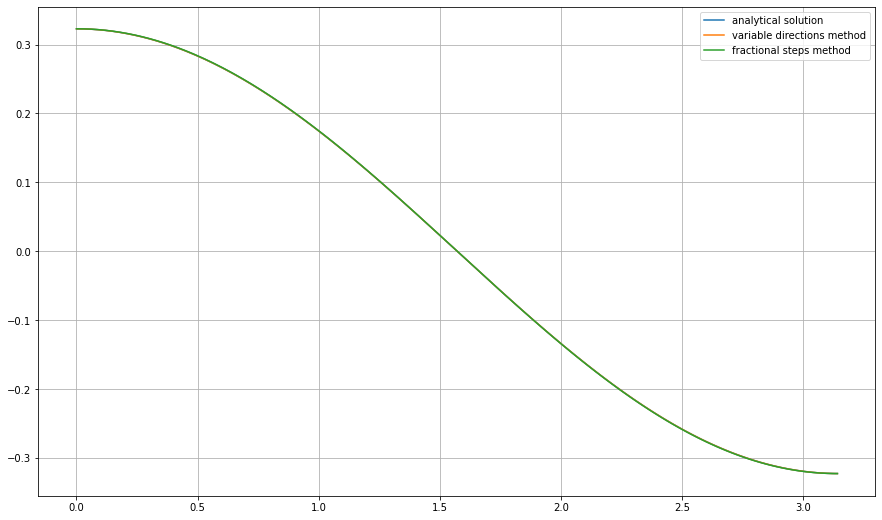

In [ ]:
plot_results(
    solutions=solutions,
    cur_time=0.5,
    cur_y=0.5,
    x_range=(x_begin, x_end),
    y_range=(y_begin, y_end),
    t_range=(t_begin, t_end),
    h_x=h_x,
    h_y=h_y,
    tau=tau
)

Посмотрим, как меняется погрешность с течением времени

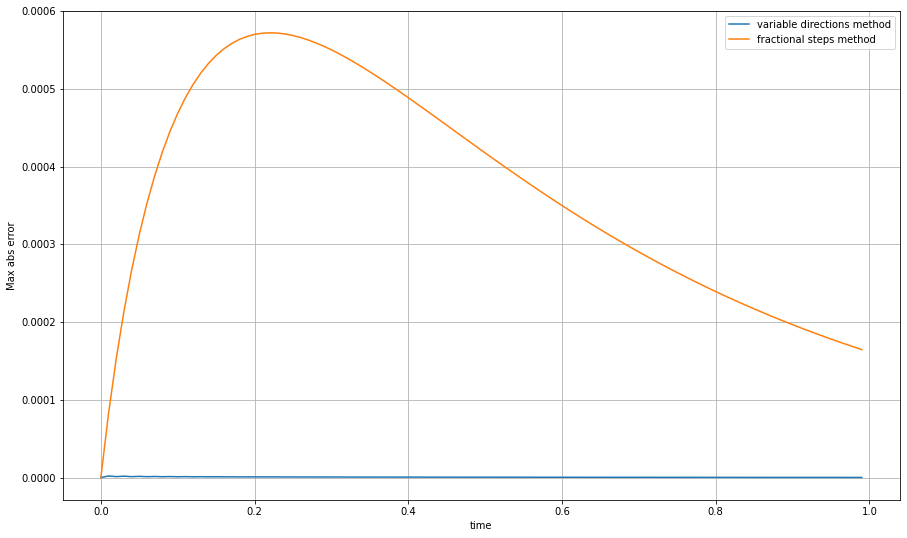

In [ ]:
plot_errors_from_time(
    solutions=solutions,
    analytical_solution_name="analytical solution",
    t_range=(t_begin, t_end),
    tau=tau,
)

### Вывод

В данной лабораторной работе я научился решать двумерные начально-краевые задачи параболического типа.

Для решения я использовал два метода:
* метод переменных направлений
* метод дробных шагов

С помощью каждого метода мне удалось получить результат с хорошей точностью